**Table of contents**<a id='toc0_'></a>    
- [Which one is a better plan?](#toc1_)    
  - [Purpose](#toc1_1_)    
  - [Hypotheses](#toc1_2_)    
  - [Initialization](#toc1_3_)    
  - [Load data](#toc1_4_)    
      - [Initial Thoughts](#toc1_4_1_1_)    
  - [Prepare the data](#toc1_5_)    
  - [Plans](#toc1_6_)    
  - [Fix data](#toc1_7_)    
  - [Users](#toc1_8_)    
    - [Fix Data](#toc1_8_1_)    
    - [Enrich Data](#toc1_8_2_)    
  - [Calls](#toc1_9_)    
    - [Fix data](#toc1_9_1_)    
    - [Enrich data](#toc1_9_2_)    
  - [Messages](#toc1_10_)    
    - [Fix data](#toc1_10_1_)    
    - [Enrich data](#toc1_10_2_)    
  - [Internet](#toc1_11_)    
    - [Fix data](#toc1_11_1_)    
    - [Enrich data](#toc1_11_2_)    
  - [Study plan conditions](#toc1_12_)    
  - [Aggregate data per user](#toc1_13_)    
  - [Study User Behavior](#toc1_14_)    
    - [Calls](#toc1_14_1_)    
        - [Null hypothesis that the mean call durations for both plans is similar](#toc1_14_1_1_1_)    
    - [Messages](#toc1_14_2_)    
        - [Null hypothesis is the mean number of messages for the plans are similar](#toc1_14_2_1_1_)    
    - [Internet](#toc1_14_3_)    
        - [Null hypothesis is that the two mean data traffic numbers are the same](#toc1_14_3_1_1_)    
        - [Null hypothesis that mean data usage is similar](#toc1_14_3_1_2_)    
  - [Revenue](#toc1_15_)    
  - [Test statistical hypotheses](#toc1_16_)    
        - [Testing the hypothesis that the average revenues from users of the Ultimate and Surf calling plans differ.](#toc1_16_1_1_1_)    
        - [Null hypothesis is the mean revenues  of the Surf and Ultimate plans are similar](#toc1_16_1_1_2_)    
    - [Testing the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.](#toc1_16_2_)    
        - [Null hypothesis that the mean revenue of Ny vs the other cities is similar](#toc1_16_2_1_1_)    
      - [Relationship between revenue and age](#toc1_16_2_2_)    
      - [Comparing revenue and age](#toc1_16_2_3_)    
- [Conclusions](#toc2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Which one is a better plan?](#toc0_)


## <a id='toc1_1_'></a>[Purpose](#toc0_)

The purpose of this project remains to analyze the data provided by the telecom operator Megaline. With an offering of two plans, Surf and Ultimate, the goal of this project is to determine optimal capital allocation. We will determine which plan brings in more revenue. This will result in an adjustment of the advertising budget, as a means to further increase revenue. The dataset provided is a sample of the population of Megaline customers, across different cities in 2018. We will conduct further analysis on the client behavior, as well as look at other important insights found in the data. 

## <a id='toc1_2_'></a>[Hypotheses](#toc0_)

Initial thoughts suggest the Surf plan would bring in more revenue, as the overage charges, combined with the limited plan allotment, would lead to many customers paying fees. The Ultimate plan is more than double the price of the Surf plan, and the company lacks and middle tier plan. As a result, we hypothesize that the Surf plan would be far more popular than the Ultimate plan, further contributing to the differences in revenue. Yet another factor could be the overages charges on the Ultimate plan, as they are far lower than those of the Surf plan. We expect to see differences in plan preference based on age, as well as revenue when looking across age groups. 

## <a id='toc1_3_'></a>[Initialization](#toc0_)

First, we need to load useful libraries that will aid us in evaluating the data.

In [3]:
# Loading all the libraries

import pandas as pd
import math as mt
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

## <a id='toc1_4_'></a>[Load data](#toc0_)

In [4]:
# Load the data files into different DataFrames
df_calls = pd.read_csv('datasets/megaline_calls.csv')
df_int = pd.read_csv('datasets/megaline_internet.csv')
df_msg = pd.read_csv('datasets/megaline_messages.csv')
df_plans = pd.read_csv('datasets/megaline_plans.csv')
df_users = pd.read_csv('datasets/megaline_users.csv')

In [5]:
# Display files to have a visual of the data
display(df_calls)
display(df_int)
display(df_msg)
display(df_plans)
display(df_users)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


#### <a id='toc1_4_1_1_'></a>[Initial Thoughts](#toc0_)

Looking at the data we see all the information needed to calculate total revenue of the two plans. However, several dataframes would need to be merged, grouped, and appended with summary columns. The user ID column appears in many tables, so that can be the key to merging the different dataframes. We would also need to categorize the data by the specific plans: Surf and Unlimited. The call, message, and session dates can be used to append the data tables with a column that specifies the month. Then, we can categorize data by month to month. Analyzing the data based on a year would me a logical fallacy, as fluctuations in usage are expected on a monthly basis. In other words, some users may exceed their plan some months, and be charged fees, while also under use their allotment another month. 

## <a id='toc1_5_'></a>[Prepare the data](#toc0_)

The data will be explored to determine the need for removing duplicates, missing values, or unnecessary columns. 

## <a id='toc1_6_'></a>[Plans](#toc0_)

In [6]:
# Print the general/summary information about the plans' DataFrame
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [7]:
# Print a sample of data for plans
display(df_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


We have a dataset that provides the variables for the two plans. We will use this data to calculate the monthly cost per customer, including overages charged to the customer. No missing values are present.

## <a id='toc1_7_'></a>[Fix data](#toc0_)

[Fix obvious issues with the data given the initial observations.]

In [8]:
# Looking at column names
df_plans.columns = ['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan']
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Nothing needs to be fixed continue to the next dataset.

## <a id='toc1_8_'></a>[Users](#toc0_)

In [9]:
# Print the general/summary information about the users' DataFrame
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Two date columns are not in the date/time format. We need to change at least the reg date to extract data from the column. We are less concerned with churn date at the moment.

In [10]:
# Check for duplicates
df_users.duplicated().sum()

0

In [11]:
# looking at unique values
df_users.nunique()

user_id       500
first_name    458
last_name     399
age            58
city           73
reg_date      266
plan            2
churn_date     29
dtype: int64

In [12]:
# Quick overview of tables and values
df_users.describe(include='all',datetime_is_numeric=True)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
count,500.000000,500,500,500.000000,500,500,500,34
unique,NaN,458,399,NaN,73,266,2,29
top,NaN,Leonila,David,NaN,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-08,surf,2018-12-18
freq,NaN,3,3,NaN,80,5,339,3
mean,1249.500000,NaN,NaN,45.486000,NaN,NaN,NaN,NaN
std,144.481833,NaN,NaN,16.972269,NaN,NaN,NaN,NaN
min,1000.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN
25%,1124.750000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN
50%,1249.500000,NaN,NaN,46.000000,NaN,NaN,NaN,NaN
75%,1374.250000,NaN,NaN,61.000000,NaN,NaN,NaN,NaN


We notice all user ID's are unique, so there are no duplicates in the data. Although there are only 458 unique first names, we expect some people could have the same name. This also applies to last names. We see this data is distributed among 73 cities. 

In [13]:
# Users who cancelled their plans 
df_users.groupby('user_id')['churn_date'].value_counts().nlargest(35)

user_id  churn_date
1006     2018-12-18    1
1363     2018-08-16    1
1281     2018-11-14    1
1296     2018-12-18    1
1298     2018-12-19    1
1300     2018-12-19    1
1315     2018-10-03    1
1358     2018-10-22    1
1402     2018-12-26    1
1012     2018-11-16    1
1414     2018-09-01    1
1416     2018-11-21    1
1441     2018-08-19    1
1451     2018-12-10    1
1466     2018-09-17    1
1467     2018-11-18    1
1269     2018-12-15    1
1246     2018-07-31    1
1220     2018-10-13    1
1191     2018-11-30    1
1186     2018-12-31    1
1180     2018-12-22    1
1172     2018-11-29    1
1129     2018-12-27    1
1106     2018-11-14    1
1094     2018-12-12    1
1084     2018-11-11    1
1083     2018-12-18    1
1067     2018-11-24    1
1054     2018-12-31    1
1050     2018-10-07    1
1040     2018-12-30    1
1022     2018-09-07    1
1491     2018-09-18    1
Name: churn_date, dtype: int64

In [14]:
# Print a sample of data for users
display(df_users)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


This dataset includes customers, their location, registration date, plan, and churn date. We have missing values in the churn date column we do not need to fix. We could set the missing values to 'active', to denote the plans are still active, yet that will convert the column data type. However, we need to change reg date to date/time format.

### <a id='toc1_8_1_'></a>[Fix Data](#toc0_)

In [15]:
# Convert churn date column format to date/time
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

In [16]:
# Convert reg date column format to date/time 
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

In [17]:
# confirm type change
df_users.dtypes

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object

Not changing value to active, as this will change the column type.


In [18]:
# look at users dataframe
display(df_users)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT


Do not need to delete data based on churn date.

### <a id='toc1_8_2_'></a>[Enrich Data](#toc0_)

In [19]:
# Add a month start column 
df_users['month_start'] = df_users['reg_date'].dt.month

In [20]:
# check proper implementation
display(df_users)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month_start
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT,9
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,2
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT,12
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,2


Added the month start colum for ease in merging data.


## <a id='toc1_9_'></a>[Calls](#toc0_)

In [21]:
# Print the general/summary information about the calls' DataFrame
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [22]:
# Print a sample of data for calls
display(df_calls)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [23]:
# Number of unique values per column
df_calls.nunique()

id           137735
user_id         481
call_date       351
duration       2802
dtype: int64

In [24]:
# Quick summary of data in columns
df_calls.describe(include='all')

,id,user_id,call_date,duration
count,137735,137735.000000,137735,137735.000000
unique,137735,NaN,351,NaN
top,1000_93,NaN,2018-12-27,NaN
freq,1,NaN,1091,NaN
mean,NaN,1247.658046,NaN,6.745927
std,NaN,139.416268,NaN,5.839241
min,NaN,1000.000000,NaN,0.000000
25%,NaN,1128.000000,NaN,1.290000
50%,NaN,1247.000000,NaN,5.980000
75%,NaN,1365.000000,NaN,10.690000


Calls data is complete with no missing values. We are not concerned with duplicates. The call date column should be changed to date/time format. We would also need to extract the month from the date, and categorize our values by user id and month. 

### <a id='toc1_9_1_'></a>[Fix data](#toc0_)

In [25]:
# Changing call date colum format to date/time
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

In [26]:
# Check for proper implementation
df_calls.dtypes

id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object

### <a id='toc1_9_2_'></a>[Enrich data](#toc0_)

In [27]:
# Create a month column 
df_calls['month'] = df_calls['call_date'].dt.month

In [28]:
# Check for proper implementation
display(df_calls)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11
137731,1499_200,1499,2018-10-20,10.89,10
137732,1499_201,1499,2018-09-21,8.12,9
137733,1499_202,1499,2018-10-10,0.37,10


In [29]:
# Group data by user ID and month, then take the sum of the call duration
df_calls_mo = df_calls.groupby(['user_id','month'])['duration'].sum()
display(df_calls_mo)

user_id  month
1000     12       116.83
1001     8        171.14
         9        297.69
         10       374.11
         11       404.59
                   ...  
1498     12       324.77
1499     9        330.37
         10       363.28
         11       288.56
         12       468.10
Name: duration, Length: 2258, dtype: float64

In [30]:
# Pivot table illustrating call duration
df_calls_pivot = df_calls.pivot_table(index='user_id',
                            columns='month',
                            values='duration',
                            aggfunc='sum'
                                     )
display(df_calls_pivot)

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.83
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171.14,297.69,374.11,404.59,392.93
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.13,359.76,363.24
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1041.00
1004,NaN,NaN,NaN,NaN,181.58,261.32,358.45,334.86,284.60,341.63,452.98,403.53
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.46,578.03,337.45,467.47
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.62,389.94,301.16,291.88,278.61
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.53


We changed the call date colum to the date/time type, and extracted the month to create a column that distinguishes the months of the data. We notice some missing values in the data, but we will keep them. It is not unusual for some months to have no data, as users could start in different months. Users could also not make any calls in a particular month, which is less likely, but still a possibility. 

## <a id='toc1_10_'></a>[Messages](#toc0_)

In [31]:
# Print the general/summary information about the messages' DataFrame
df_msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [32]:
# Print a sample of data for messages
display(df_msg)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [33]:
# Quick overview of the data in user ID column
df_msg.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


Message dataframe has a message date column that needs to be changed to date/time format. We do not see missing values, and are not concerned with duplicates. We would need to extract the month from the message day, group by user id, and count the number of messages for that month. 

### <a id='toc1_10_1_'></a>[Fix data](#toc0_)

In [34]:
# convert column message date format to date/time
df_msg['message_date'] = pd.to_datetime(df_msg['message_date'], format='%Y-%m-%d')

In [35]:
# Ensure proper implementation
df_msg.dtypes

id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object

### <a id='toc1_10_2_'></a>[Enrich data](#toc0_)

In [36]:
# Create a month column from message date
df_msg['month'] = df_msg['message_date'].dt.month

In [37]:
# Visual of new column, month
display(df_msg)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


In [38]:
# grouping data by user ID and month, then counting the number of times a message was sent in that month
df_msg_mo = df_msg.groupby(['user_id','month'])['message_date'].count().reset_index() 
df_msg_mo.columns = ['user_id', 'month', 'message_count']
display(df_msg_mo)

,user_id,month,message_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [39]:
# Pivot table showing the number of messages
df_msg_pivot = df_msg.pivot_table(index='user_id',
                            columns='month',
                            aggfunc='count'
                                     )
display(df_msg_pivot)

id                                                   ...  \
month    1   2   3    4     5     6     7     8     9     10  ...   
user_id                                                       ...   
1000    NaN NaN NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1001    NaN NaN NaN  NaN   NaN   NaN   NaN  30.0  44.0  53.0  ...   
1002    NaN NaN NaN  NaN   NaN   NaN   NaN   NaN   NaN  15.0  ...   
1003    NaN NaN NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1004    NaN NaN NaN  NaN   7.0  18.0  26.0  25.0  21.0  24.0  ...   
...      ..  ..  ..  ...   ...   ...   ...   ...   ...   ...  ...   
1491    NaN NaN NaN  6.0  45.0  54.0  64.0  50.0  50.0  51.0  ...   
1492    NaN NaN NaN  NaN   NaN   NaN   NaN   NaN  11.0  29.0  ...   
1494    NaN NaN NaN  NaN   NaN   NaN  20.0  27.0  21.0  38.0  ...   
1496    NaN NaN NaN  NaN   NaN   NaN   NaN   2.0  21.0  18.0  ...   
1497    NaN NaN NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

        message_date                                                       
month             3    4     5     6     7     8     9     10    11    12  
user_id                                                                    
1000             NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  11.0  
1001             NaN  NaN   NaN   NaN   NaN  30.0  44.0  53.0  36.0  44.0  
1002             NaN  NaN   NaN   NaN   NaN   NaN   NaN  15.0  32.0  41.0  
1003             NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  50.0  
1004             NaN  NaN   7.0  18.0  26.0  25.0  21.0  24.0  25.0  31.0  
...              ...  ...   ...   ...   ...   ...   ...   ...   ...   ...  
1491             NaN  6.0  45.0  54.0  64.0  50.0  50.0  51.0  46.0  43.0  
1492             NaN  NaN   NaN   NaN   NaN   NaN  11.0  29.0  31.0  37.0  
1494             NaN  NaN   NaN   NaN  20.0  27.0  21.0  38.0  35.0  33.0  
1496             NaN  NaN   NaN   NaN   NaN   2.0  21.0  18.0  13.0  11.0  
1497             NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  50.0  

[402 rows x 24 columns]

We see some missing values, as expected, due to people starting their plans in different months. We will not fill in the missing data. 

## <a id='toc1_11_'></a>[Internet](#toc0_)

In [40]:
# Print the general/summary information about the internet DataFrame
df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [41]:
# Print a sample of data for the internet traffic
display(df_int.head())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


The internet data does not contain missing values, and we are not concerned with duplicates. We would need to perform similar strategies with the previous tables. We should extract the month, and organize the mb used by user id and month.

### <a id='toc1_11_1_'></a>[Fix data](#toc0_)

In [42]:
# Convert session date format to date/time
df_int['session_date'] = pd.to_datetime(df_int['session_date'], format='%Y-%m-%d')

In [43]:
# Check proper implementation
df_int.dtypes

id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object

Converted session date to date/time format.

### <a id='toc1_11_2_'></a>[Enrich data](#toc0_)

In [44]:
# Created a month column from session date
df_int['month'] = df_int['session_date'].dt.month

In [45]:
# check proper implementation
display(df_int.head())

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


Added a month column to group data based on month.

In [46]:
# Grouped the data based on user ID and month, then took the sum of the data used 
df_int_mo = df_int.groupby(['user_id', 'month'])['mb_used'].sum()
display(df_int_mo)

user_id  month
1000     12        1901.47
1001     8         6919.15
         9        13314.82
         10       22330.49
         11       18504.30
                    ...   
1498     12       23137.69
1499     9        12984.76
         10       19492.43
         11       16813.83
         12       22059.21
Name: mb_used, Length: 2277, dtype: float64

In [47]:
# Pivot table of data used per month
df_int_pivot = df_int.pivot_table(index='user_id',
                            columns='month',
                            values='mb_used',
                            aggfunc='sum'
                                     )
display(df_int_pivot)

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901.47
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6919.15,13314.82,22330.49,18504.30,19369.18
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6552.01,19345.08,14396.24
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27044.14
1004,NaN,NaN,NaN,NaN,6547.21,20672.82,24516.62,27981.74,18852.72,14541.63,21850.78,21389.29
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22981.37,26899.41,24912.78,24097.40
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8605.66,16389.27,14287.36,8547.36,16438.99
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11106.55


Pivot table groups data by user id and month, then sums the data used in megabytes. We will keep the missing values. 

## <a id='toc1_12_'></a>[Study plan conditions](#toc0_)

In [48]:
# Print out the plan conditions
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


There are two plans: Surf and Ultimate. Surf costs 20 dollars per month, and includes overage fees. The ultimate plan is 70 dollars per month and also includes overage fees, but they are less than that of Surf. Data included in the plans is in megabytes, yet the cost is in gigabytes. We will use the conversion factor of 1 gb = 1024 mb. We note that the currency is US dollars. 

## <a id='toc1_13_'></a>[Aggregate data per user](#toc0_)



In [49]:
# Calculate the number of calls made by each user per month. Save the result.

df_calls_num = df_calls.groupby(['user_id','month'])['duration'].count().reset_index()
df_calls_num.columns = ['user_id', 'month', 'calls']


In [50]:
# Reset index
df_calls_mo.reset_index()

,user_id,month,duration
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
...,...,...,...
2253,1498,12,324.77
2254,1499,9,330.37
2255,1499,10,363.28
2256,1499,11,288.56


In [51]:
# Reset index
df_msg = df_msg.loc[:,'user_id':]


In [52]:
# Calculate the number of messages sent by each user per month. Save the result.
df_msg_mo

,user_id,month,message_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [53]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
df_int_mo.reset_index()

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


In [54]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
df_1 = df_calls_num.merge(df_calls_mo, on=('user_id', 'month'), how='outer')


In [55]:
# Appending data column
df_2 = df_1.merge(df_int_mo, on=('user_id', 'month'), how='outer')


In [56]:
# Appending number of messages column 
df_3= df_2.merge(df_msg_mo, on=('user_id', 'month'), how='outer')
df_3.columns = ['user_id', 'month', 'num_calls', 'call_duration', 'mb_used', 'num_messages']


In [57]:
# User ID and plan table 
df_user_plan = df_users[['user_id', 'plan']]


In [58]:
# Add the plan information, merge on user ID
df_4 = df_3.merge(df_user_plan, on='user_id', how='outer')


In [59]:
# Visual of plans table
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [60]:
# Merging for final dataset
df_merged = df_4.merge(df_plans, on='plan', how='outer')
df_merged = df_merged.fillna(0)


In [61]:
# check for missing values
df_merged.isna().sum()

user_id                  0
month                    0
num_calls                0
call_duration            0
mb_used                  0
num_messages             0
plan                     0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
dtype: int64

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan).]

In [62]:
# Function to round up minutes, gb data
def round_up(n, decimals=0):
    multiplier = 10 ** decimals
    return mt.ceil(n * multiplier) / multiplier

In [63]:
# Checking functionality of round function
round_up(31.366)

32.0

In [64]:
# Calculate the monthly revenue for each user
# using megabytes instead of gigabytes, converted cost to appropriate value

def revenue(row) :
    
    additional_mins = 0                      # to add additional minutes
    additional_messages = 0                  # to add additional messages
    additional_gb = 0                        # to add additional data
    surf = 20                                # base price of Surf plan
    ultimate = 70                            # base price of Ultimate Plan
    
    plan = row['plan']                       # looking at the plan row
    call = round_up(row['call_duration'])    # rounding the call duration to the nearest minute
    gb = round_up(row['mb_used'] / 1024)     # rounding the data to the nearest gigabyte
    
    
    if plan == 'surf' :
        if call > 500 :                      
            additional_mins = call - 500
        if row['num_messages'] > 50 :
            additional_messages = row['num_messages'] - 50
        if gb > 15 :
            additional_gb = gb - 15
        profit = (additional_mins * 0.03) + (additional_messages * 0.03) + (additional_gb * 10 )
        if profit == 0 :
            return surf
        else :
            return profit + surf

        
    if plan == 'ultimate' :
        if call > 3000 :
            additional_mins = call - 3000
        if row['num_messages'] > 1000 :
            additional_messages = row['num_messages'] - 1000      
        if gb > 30 :
            additional_gb = gb - 30
        profit = (additional_mins * 0.01) + (additional_messages * 0.01) + (additional_gb * 7 )
        if profit == 0 :
            return ultimate
        else :
            return profit + ultimate

## <a id='toc1_14_'></a>[Study User Behavior](#toc0_)

Here, we will calculate some useful descriptive statistics for the aggregated and merged data, to reveal an overall picture captured by the data. We will display useful plots to help with the understanding of the given data. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots will be calculated on a per-plan, and on a per month basis. Insights will be given on the relationships of the data among the various parameters, including age and location.

### <a id='toc1_14_1_'></a>[Calls](#toc0_)

In [65]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
df_merged_calls = df_merged.groupby(['plan', 'month'])['call_duration'].mean()
display(df_merged_calls.reset_index())

,plan,month,call_duration
0,surf,0.0,0.000000
1,surf,1.0,192.840000
2,surf,2.0,280.851111
3,surf,3.0,310.970000
4,surf,4.0,332.380000
5,surf,5.0,377.053247
6,surf,6.0,407.208866
7,surf,7.0,424.523223
8,surf,8.0,387.169630
9,surf,9.0,390.992062


In [66]:
# Separated calls on Surf plan
df_surf_calls = df_merged_calls[1:13].reset_index('plan')

In [67]:
# Separated calls on Ultimate plan
df_ultimate_calls = df_merged_calls.reset_index('plan').tail(12)

In [68]:
# merged Surf and Ultimate call plans side by side
df_all_calls = df_surf_calls.merge(df_ultimate_calls, on='month', how='outer')
df_all_calls.columns = ['plan_s', 'surf', 'plan_u', 'ultimate'] 

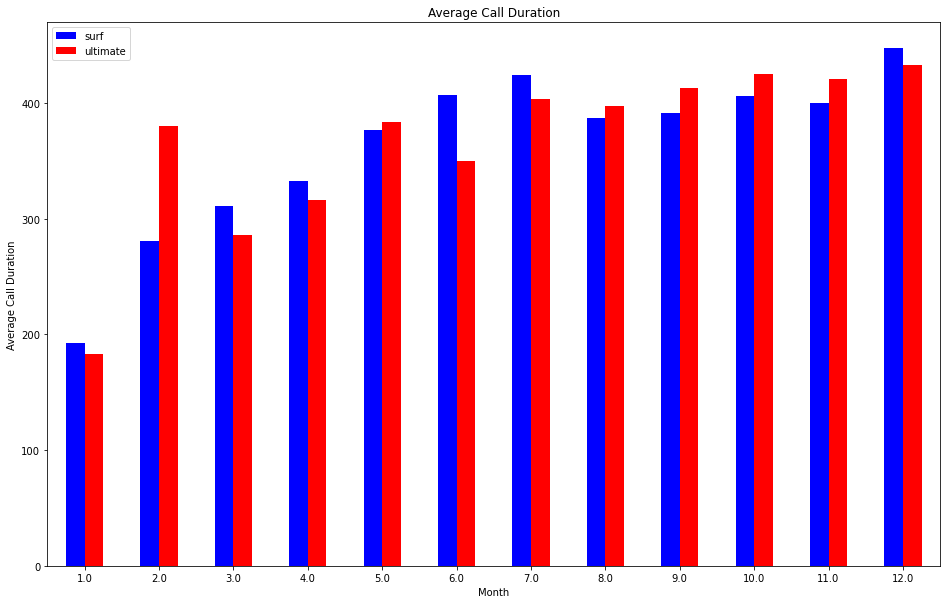

In [69]:
# Plot call duration on Surf and Ultimate plans, by month
df_all_calls.plot(kind='bar',
                    title='Average Call Duration',
                  xlabel='Month',
                  ylabel='Average Call Duration',
                  color=('blue', 'red'),
                  rot=0,
                  figsize= (16,10)
                    )
plt.show()

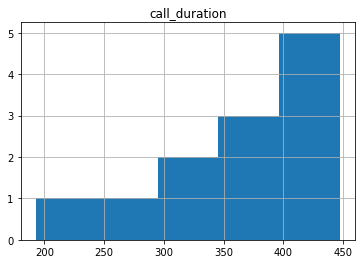

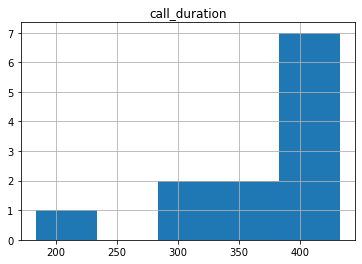

In [70]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
df_surf_calls.hist(bins=5)
df_ultimate_calls.hist(bins=5)
plt.title='Minutes Required'
plt.show()

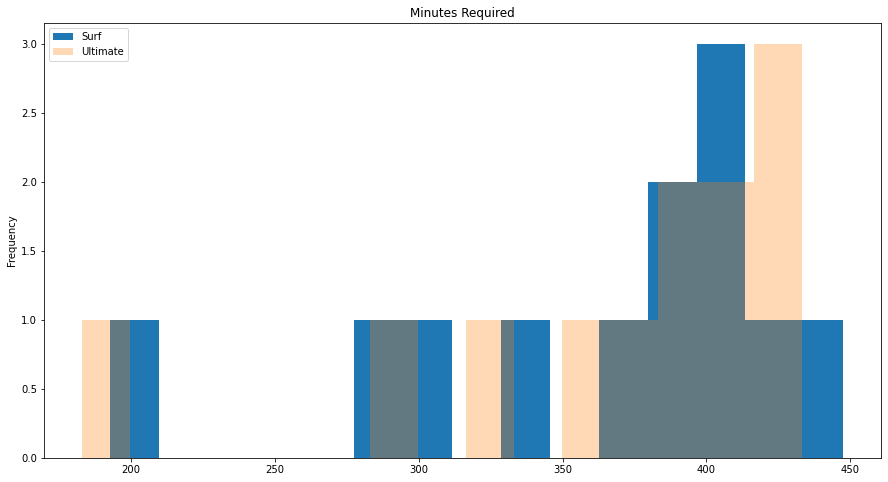

In [71]:
# The merged histograms
df_surf_calls['call_duration'].plot(kind='hist', bins=15, title='Minutes Required', ylabel='Frequency', figsize=(15,8))
df_ultimate_calls['call_duration'].plot(kind='hist', bins=15, alpha=0.3)

plt.legend(['Surf', 'Ultimate'])
plt.show()

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [72]:
# Calculate the mean and the variance of the monthly call duration, Surf plan
print('mean')
print(df_surf_calls.mean())
print()
print('variance')
print(df_surf_calls.var())

mean
call_duration    363.062967
dtype: float64

variance
call_duration    5177.321155
dtype: float64


C:\Users\XIX\AppData\Local\Temp\ipykernel_24004\3673763875.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_surf_calls.mean())
C:\Users\XIX\AppData\Local\Temp\ipykernel_24004\3673763875.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_surf_calls.var())


In [73]:
# Calculate the mean and the variance of the monthly call duration, Ultimate plan
print('mean')
print(df_ultimate_calls.mean())
print()
print('variance')
print(df_ultimate_calls.var())

mean
call_duration    365.974762
dtype: float64

variance
call_duration    5335.727136
dtype: float64


C:\Users\XIX\AppData\Local\Temp\ipykernel_24004\848826890.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_ultimate_calls.mean())
C:\Users\XIX\AppData\Local\Temp\ipykernel_24004\848826890.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_ultimate_calls.var())


<AxesSubplot:title={'center':'Monthly Call Duration'}>

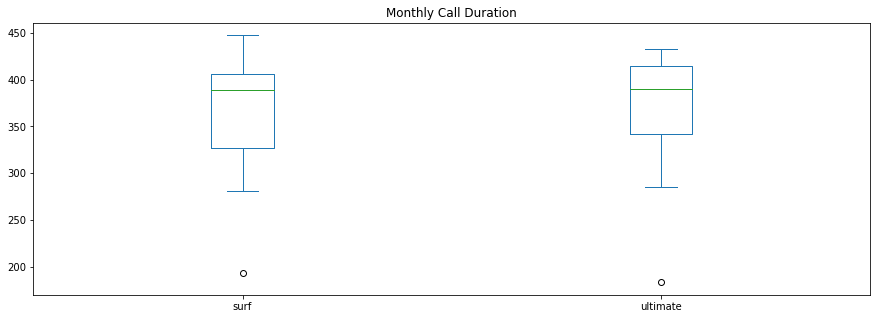

In [74]:
# Plot a boxplot to visualize the distribution of the monthly call duration
df_all_calls.plot(kind='box', title='Monthly Call Duration', figsize=(15,5))


In [75]:
# surf call durations
surf_calls = df_surf_calls['call_duration'].values.tolist()

In [76]:
# ultimate call durations
ultimate_calls = df_ultimate_calls['call_duration'].values.tolist()

##### <a id='toc1_14_1_1_1_'></a>[Null hypothesis that the mean call durations for both plans is similar](#toc0_)

In [77]:
# Test the hypotheses
# Null hypothesis that the two means are the same
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(surf_calls, ultimate_calls)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis, the average call durations differ")
else:
    print("We can't reject the null hypothesis") 


p-value:  0.9225249438414813
We can't reject the null hypothesis


The users of the two plans seem to have similar calling behavior, when considering call durations. In general, Surf plan customers and Ultimate plan customers have more messages 6 months each, out of the year. The mean call durations for both plans appeared to be similar, further visualized by the box plots, but we will test this hypothesis statistically. The Ultimate plan sees a greater variance in call duration compared to the Surf plan. This may be attributed to the outlier we see in the box plot of the Ultimate plan, yet the Surf plan has an outlier as well. Hypothesis testing suggests we cannot reject the null hypothesis that the mean call duration of both plans is similar.

### <a id='toc1_14_2_'></a>[Messages](#toc0_)

In [78]:
# Visual of dataset we are working with
df_merged

,user_id,month,num_calls,call_duration,mb_used,num_messages,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12.0,16.0,116.83,1901.47,11.0,ultimate,1000,30720,3000,70,7,0.01,0.01
1,1006,11.0,2.0,9.32,2068.37,15.0,ultimate,1000,30720,3000,70,7,0.01,0.01
2,1006,12.0,9.0,54.79,32118.82,139.0,ultimate,1000,30720,3000,70,7,0.01,0.01
3,1008,10.0,71.0,450.21,17106.99,21.0,ultimate,1000,30720,3000,70,7,0.01,0.01
4,1008,11.0,63.0,422.81,23676.72,37.0,ultimate,1000,30720,3000,70,7,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,0.0,0.0,0.00,0.00,0.0,surf,50,15360,500,20,10,0.03,0.03
2299,1307,0.0,0.0,0.00,0.00,0.0,surf,50,15360,500,20,10,0.03,0.03
2300,1319,0.0,0.0,0.00,0.00,0.0,surf,50,15360,500,20,10,0.03,0.03
2301,1378,0.0,0.0,0.00,0.00,0.0,surf,50,15360,500,20,10,0.03,0.03


In [79]:
# Compare the number of messages users of each plan tend to send each month
df_merged_msg = df_merged.groupby(['plan', 'month'])['num_messages'].mean()
display(df_merged_msg.reset_index())

,plan,month,num_messages
0,surf,0.0,0.000000
1,surf,1.0,10.500000
2,surf,2.0,12.000000
3,surf,3.0,15.260870
4,surf,4.0,17.400000
5,surf,5.0,24.012987
6,surf,6.0,25.298969
7,surf,7.0,27.033058
8,surf,8.0,28.777778
9,surf,9.0,30.762887


In [80]:
# number of messages sent per month, Surf plan
df_surf_msgs = df_merged_msg[1:13].reset_index('plan')

In [81]:
# number of messages sent per month, Ultimate plan
df_ultimate_msgs = df_merged_msg.reset_index('plan').tail(12)

In [82]:
# Merged the dataset of the two plans side by side
df_all_msgs = df_surf_msgs.merge(df_ultimate_msgs, on='month', how='outer')
df_all_msgs.columns = ['plan_s', 'surf', 'plan_u', 'ultimate'] 

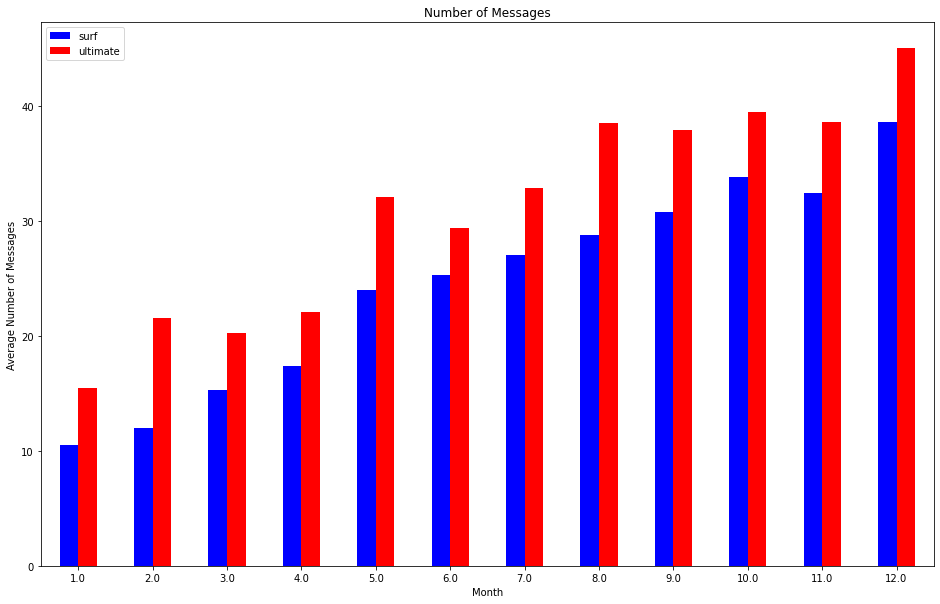

In [83]:
# Displaying chart of the number of messages per plan, per month
df_all_msgs.plot(kind='bar',
                    title='Number of Messages',
                  xlabel='Month',
                  ylabel='Average Number of Messages',
                  color=('blue', 'red'),
                 rot=0,
                  figsize= (16,10)
                    )
plt.show()

In [84]:
# showing statistical metrics
print('mean')
print(df_surf_msgs.mean())
print()
print('variance')
print(df_surf_msgs.var())

mean
num_messages    24.656
dtype: float64

variance
num_messages    81.888846
dtype: float64


C:\Users\XIX\AppData\Local\Temp\ipykernel_24004\2921719458.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_surf_msgs.mean())
C:\Users\XIX\AppData\Local\Temp\ipykernel_24004\2921719458.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_surf_msgs.var())


In [85]:
# Mean and variance of ultimate messages
print('mean')
print(df_ultimate_msgs.mean())
print()
print('variance')
print(df_ultimate_msgs.var())

mean
num_messages    31.089497
dtype: float64

variance
num_messages    87.353963
dtype: float64


C:\Users\XIX\AppData\Local\Temp\ipykernel_24004\1981465832.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_ultimate_msgs.mean())
C:\Users\XIX\AppData\Local\Temp\ipykernel_24004\1981465832.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_ultimate_msgs.var())


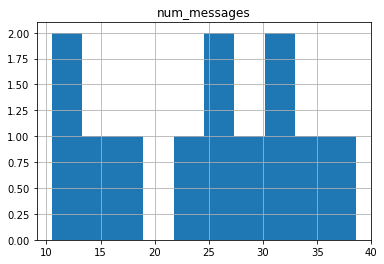

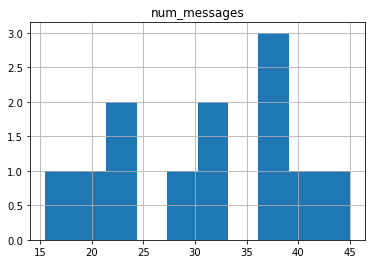

In [86]:
# distribution of surf messages
df_surf_msgs.hist(bins=10)
df_ultimate_msgs.hist(bins=10)
plt.title='Messages'
plt.show()

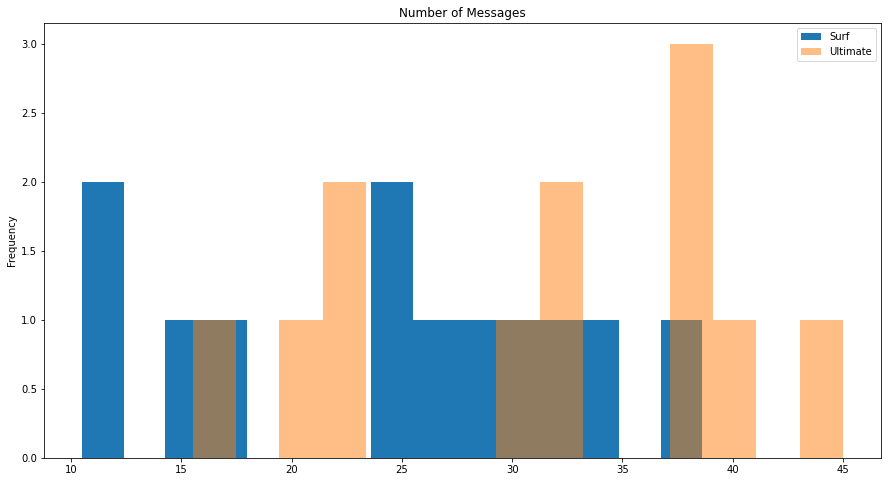

In [87]:
# surf and ultimate messages
df_surf_msgs['num_messages'].plot(kind='hist', bins=15, title='Number of Messages', ylabel='Frequency', figsize=(15,8))
df_ultimate_msgs['num_messages'].plot(kind='hist', bins=15, alpha=0.5)

plt.legend(['Surf', 'Ultimate'])
plt.show()

<AxesSubplot:title={'center':'Monthly Number of Messages'}>

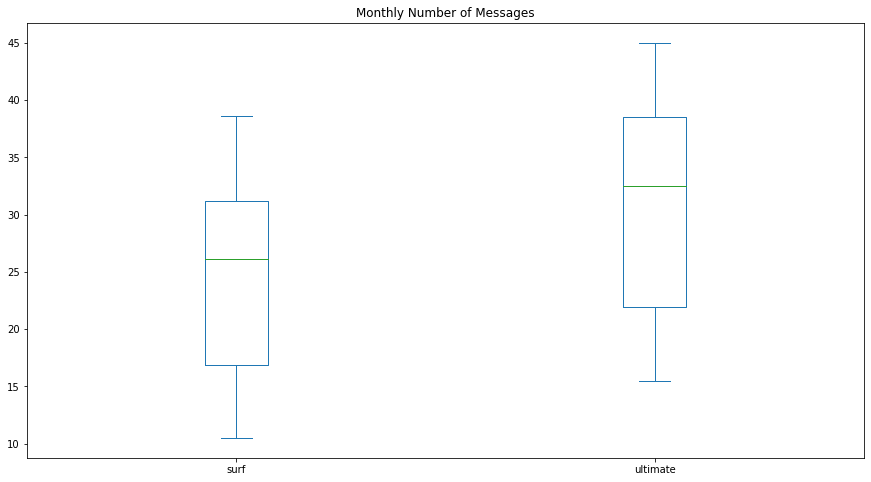

In [88]:
# Plot a boxplot to visualize the distribution of the monthly call duration
df_all_msgs.plot(kind='box', title='Monthly Number of Messages', figsize=(15,8))

In [89]:
# surf message values
surf_msgs = df_surf_msgs['num_messages'].values.tolist()

In [90]:
# ultimate message values
ultimate_msgs = df_ultimate_msgs['num_messages'].values.tolist()

##### <a id='toc1_14_2_1_1_'></a>[Null hypothesis is the mean number of messages for the plans are similar](#toc0_)

In [91]:
# Test the hypotheses
# Null hypothesis that the two means are the same
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(surf_msgs, ultimate_msgs)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis, the average number of messages differ")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.10075353966021278
We can't reject the null hypothesis


The number of messages sent by customers of the Ultimate plan is consistently greater than that of Surf customers. The mean of the number of messages of the two plans appear different, however, we need to test this. Looking at the boxplot, we see the two plans are similar, and both have wide upper and lower bounds. Hypothesis testing suggests the average number of messages does not differ, contrary to our earlier thoughts.  

### <a id='toc1_14_3_'></a>[Internet](#toc0_)

In [92]:
# Compare the amount of internet traffic consumed by users per plan
df_merged


,user_id,month,num_calls,call_duration,mb_used,num_messages,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12.0,16.0,116.83,1901.47,11.0,ultimate,1000,30720,3000,70,7,0.01,0.01
1,1006,11.0,2.0,9.32,2068.37,15.0,ultimate,1000,30720,3000,70,7,0.01,0.01
2,1006,12.0,9.0,54.79,32118.82,139.0,ultimate,1000,30720,3000,70,7,0.01,0.01
3,1008,10.0,71.0,450.21,17106.99,21.0,ultimate,1000,30720,3000,70,7,0.01,0.01
4,1008,11.0,63.0,422.81,23676.72,37.0,ultimate,1000,30720,3000,70,7,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,0.0,0.0,0.00,0.00,0.0,surf,50,15360,500,20,10,0.03,0.03
2299,1307,0.0,0.0,0.00,0.00,0.0,surf,50,15360,500,20,10,0.03,0.03
2300,1319,0.0,0.0,0.00,0.00,0.0,surf,50,15360,500,20,10,0.03,0.03
2301,1378,0.0,0.0,0.00,0.00,0.0,surf,50,15360,500,20,10,0.03,0.03


In [93]:
# Compare the amount of internet traffic consumed by users per plan
df_ints_traffic = df_merged.groupby(['plan', 'month'])['mb_used'].count()

df_ints_traffic.columns = ['plan', 'month', 'internet_traffic']
display(df_ints_traffic.reset_index())

,plan,month,mb_used
0,surf,0.0,6
1,surf,1.0,2
2,surf,2.0,9
3,surf,3.0,23
4,surf,4.0,50
5,surf,5.0,77
6,surf,6.0,97
7,surf,7.0,121
8,surf,8.0,162
9,surf,9.0,194


In [94]:
# Internet traffic for Surf customers
df_surf_ints_traffic = df_ints_traffic[1:13].reset_index('plan')

In [95]:
# Internet traffic for Ultimate customers 
df_ultimate_ints_traffic = df_ints_traffic.reset_index('plan').tail(12)

In [96]:
# internet trffic for both Surf and Ultiate customers, merged on month
df_all_ints_traffic = df_surf_ints_traffic.merge(df_ultimate_ints_traffic, on='month', how='outer')
df_all_ints_traffic.columns = ['plan_s', 'surf', 'plan_u', 'ultimate'] 

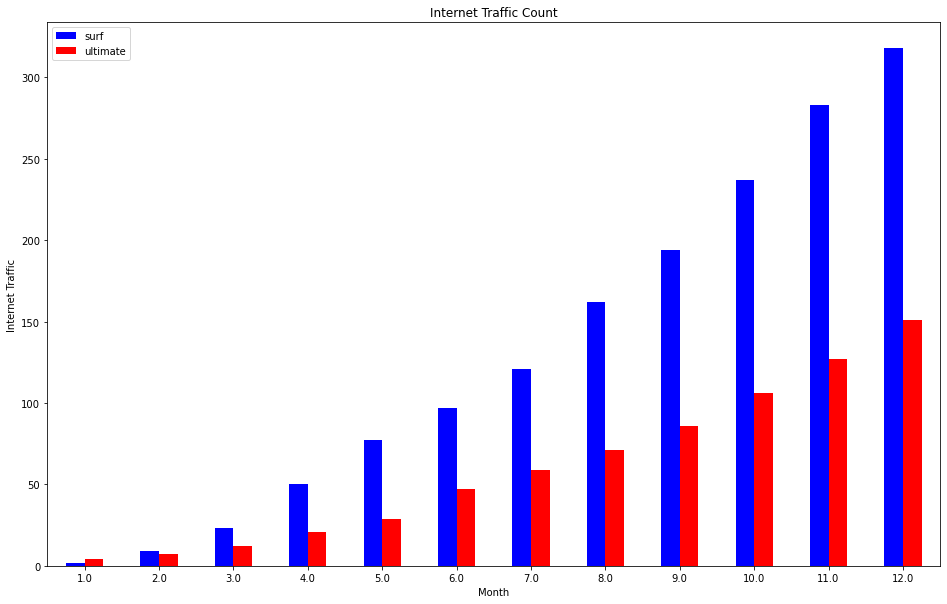

In [97]:
# Display chart on Internet traffic by plan, by month
df_all_ints_traffic.plot(kind='bar',
                    title='Internet Traffic Count',
                  xlabel='Month',
                  ylabel='Internet Traffic',
                  color=('blue', 'red'),
                 rot=0,
                  figsize= (16,10)
                    )
plt.show()

In [98]:
# Surf internet traffic mean and variance
print('mean')
print(df_surf_ints_traffic.mean())
print()
print('variance')
print(df_surf_ints_traffic.var())

mean
mb_used    131.083333
dtype: float64

variance
mb_used    11650.992424
dtype: float64


C:\Users\XIX\AppData\Local\Temp\ipykernel_24004\3245096143.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_surf_ints_traffic.mean())
C:\Users\XIX\AppData\Local\Temp\ipykernel_24004\3245096143.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_surf_ints_traffic.var())


In [99]:
# Ultimate internet traffic mean and variance
print('mean')
print(df_ultimate_ints_traffic.mean())
print()
print('variance')
print(df_ultimate_ints_traffic.var())

mean
mb_used    60.0
dtype: float64

variance
mb_used    2416.727273
dtype: float64


C:\Users\XIX\AppData\Local\Temp\ipykernel_24004\94670807.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_ultimate_ints_traffic.mean())
C:\Users\XIX\AppData\Local\Temp\ipykernel_24004\94670807.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_ultimate_ints_traffic.var())


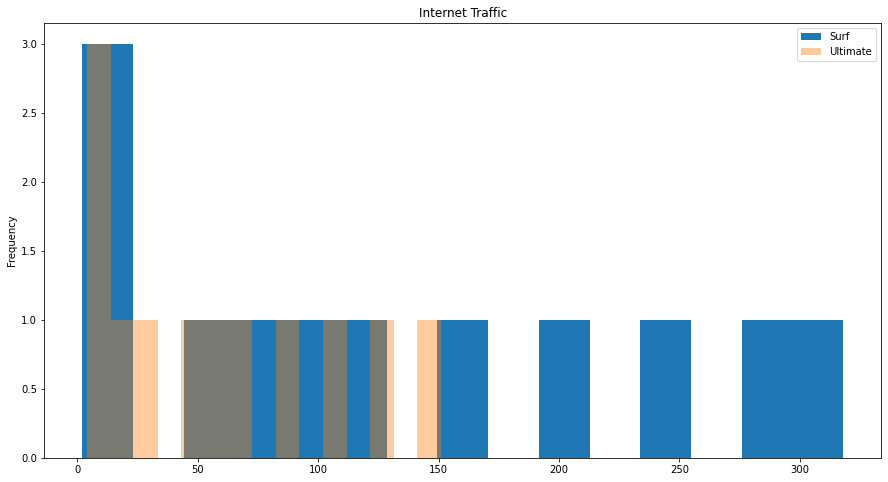

In [100]:
# Display histogram of internet traffic per month, per plan
df_surf_ints_traffic['mb_used'].plot(kind='hist', bins=15, title='Internet Traffic', ylabel='Frequency', figsize=(15,8))
df_ultimate_ints_traffic['mb_used'].plot(kind='hist', bins=15, alpha=0.4)


plt.legend(['Surf', 'Ultimate'])
plt.show()

<AxesSubplot:title={'center':'Monthly Internet Traffic'}>

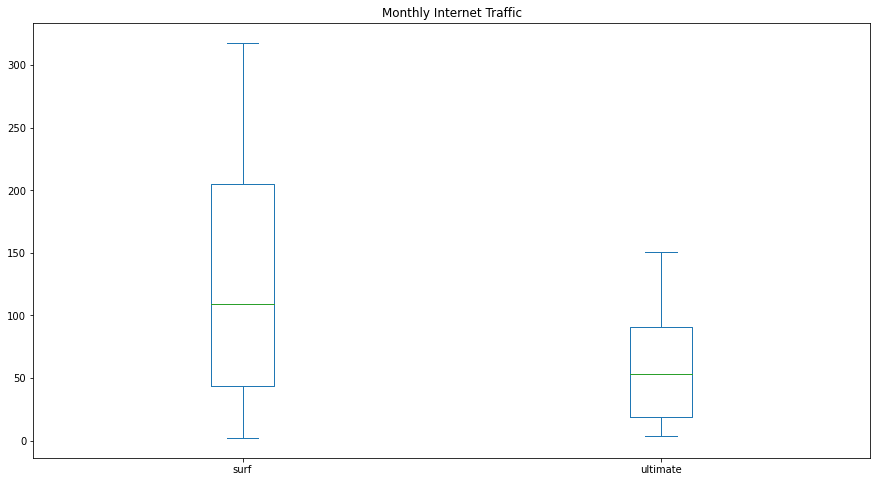

In [101]:
# Plot a boxplot to visualize the distribution of the monthly internet traffic
df_all_ints_traffic.plot(kind='box', title='Monthly Internet Traffic', figsize=(15,8))

In [102]:
# surf traffic values
surf_ints_traffic = df_surf_ints_traffic['mb_used'].values.tolist()

In [103]:
# ultimate traffic values
ultimate_ints_traffic = df_ultimate_ints_traffic['mb_used'].values.tolist()

##### <a id='toc1_14_3_1_1_'></a>[Null hypothesis is that the two mean data traffic numbers are the same](#toc0_)

In [104]:
# Test the hypotheses
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(surf_ints_traffic, ultimate_ints_traffic)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis, the average data traffic numbers differ")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.04977590665959082
We reject the null hypothesis, the average data traffic numbers differ


The Surf plan consistently sees more internet traffic than the Ultimate plan, with one exception. The mean internet traffic values appears to be quite different, further emphasized by the box plot. The upper and lower bounds of the Surf plan are wider than that of the Ultimate plan. This is made evident by the variance in the Surf data usage. Hypothesis testing further supports that the average traffic data numbers differ.

In [105]:
# Compare average mb used per each plan per each distinct month. Plot a bar plat to visualize it.
df_merged_ints = df_merged.groupby(['plan', 'month'])['mb_used'].mean()
display(df_merged_ints.reset_index())

,plan,month,mb_used
0,surf,0.0,0.000000
1,surf,1.0,4874.860000
2,surf,2.0,12178.843333
3,surf,3.0,13345.440000
4,surf,4.0,11984.203000
5,surf,5.0,13936.354935
6,surf,6.0,15301.529175
7,surf,7.0,16783.600579
8,surf,8.0,16795.331358
9,surf,9.0,16591.431289


In [106]:
# Data used per month in Surf plan
df_surf_ints = df_merged_ints[1:13].reset_index('plan')

In [107]:
# Data used per month in Ultimate plan
df_ultimate_ints = df_merged_ints.reset_index('plan').tail(12)

In [108]:
# Merging of Surf and Ultimate data usage, per month
df_all_ints = df_surf_ints.merge(df_ultimate_ints, on='month', how='outer')
df_all_ints.columns = ['plan_s', 'surf', 'plan_u', 'ultimate'] 

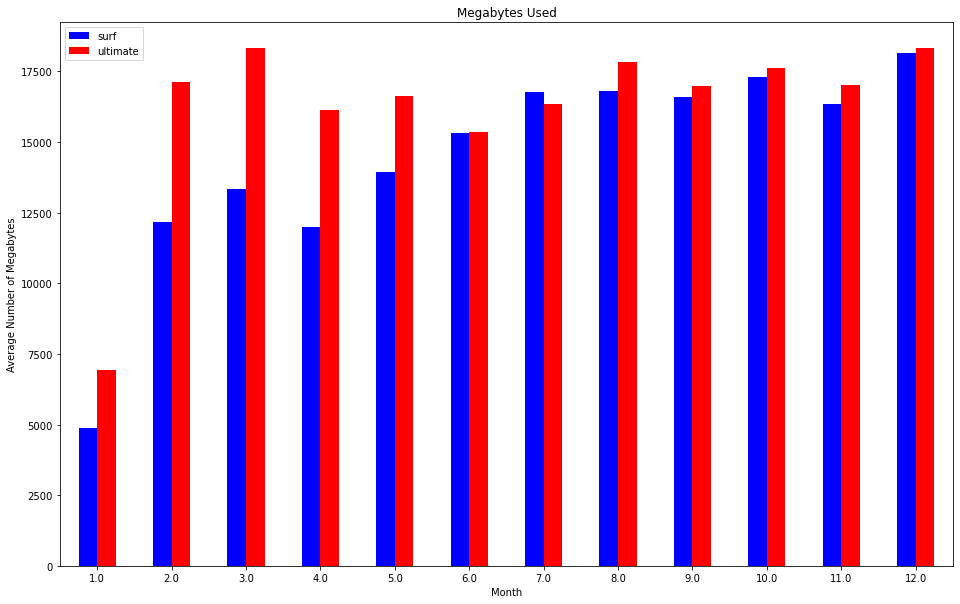

In [109]:
# Display visual of internet usage per month, per plan
df_all_ints.plot(kind='bar',
                    title='Megabytes Used',
                  xlabel='Month',
                  ylabel='Average Number of Megabytes',
                  color=('blue', 'red'),
                 rot=0,
                  figsize= (16,10)
                    )
plt.show()

In [110]:
# Mean and variance of Surf data usage
print('mean')
print(df_surf_ints.mean())
print()
print('variance')
print(df_surf_ints.var())

mean
mb_used    14464.554377
dtype: float64

variance
mb_used    1.327065e+07
dtype: float64


C:\Users\XIX\AppData\Local\Temp\ipykernel_24004\3548975033.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_surf_ints.mean())
C:\Users\XIX\AppData\Local\Temp\ipykernel_24004\3548975033.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_surf_ints.var())


In [111]:
# Mean and variance of Ultimate data usage
print('mean')
print(df_ultimate_ints.mean())
print()
print('variance')
print(df_ultimate_ints.var())

mean
mb_used    16212.603528
dtype: float64

variance
mb_used    9.351289e+06
dtype: float64


C:\Users\XIX\AppData\Local\Temp\ipykernel_24004\3184717699.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_ultimate_ints.mean())
C:\Users\XIX\AppData\Local\Temp\ipykernel_24004\3184717699.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_ultimate_ints.var())


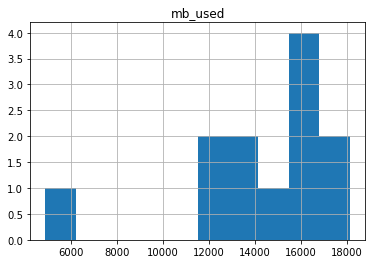

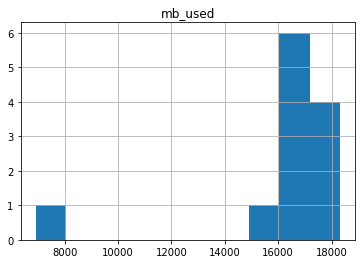

In [112]:
# Histogras of Surf and Ultimate data usage
df_surf_ints.hist(bins=10)
df_ultimate_ints.hist(bins=10)
plt.title='Megabytes'
plt.show()

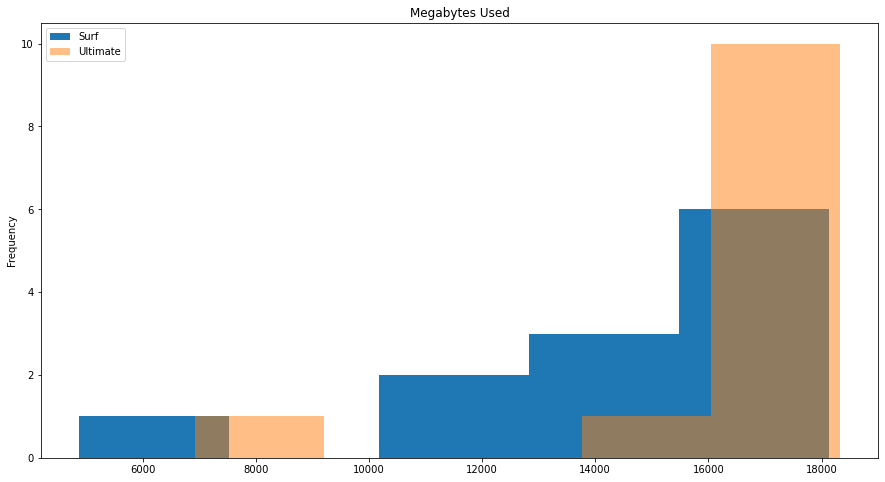

In [113]:
# Merged histogram of Surf and Ultimate dat usage
df_surf_ints['mb_used'].plot(kind='hist', bins=5, title='Megabytes Used', ylabel='Frequency', figsize=(15,8))
df_ultimate_ints['mb_used'].plot(kind='hist', bins=5, alpha=0.5)


plt.legend(['Surf', 'Ultimate'])
plt.show()

<AxesSubplot:title={'center':'Monthly Megabytes Used'}>

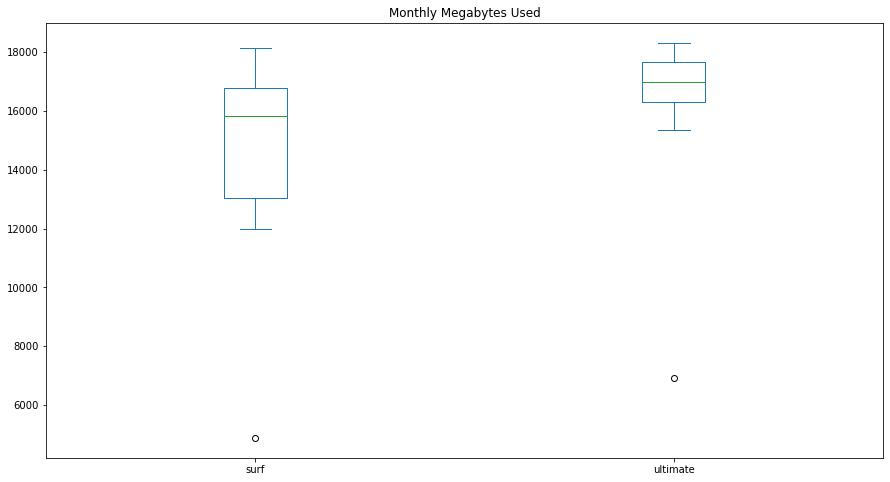

In [114]:
# Plot a boxplot to visualize the distribution of the monthly call duration
df_all_ints.plot(kind='box', title='Monthly Megabytes Used', figsize=(15,8))

In [115]:
# surf mb values
surf_ints = df_surf_ints['mb_used'].values.tolist()

In [116]:
# surf megabyte values
ultimate_ints = df_ultimate_ints['mb_used'].values.tolist()

##### <a id='toc1_14_3_1_2_'></a>[Null hypothesis that mean data usage is similar](#toc0_)

In [117]:
# Test the hypotheses
# Null hypothesis that the two means are the same
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(surf_ints, ultimate_ints)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis, the average data usages differ")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.21625434664424556
We can't reject the null hypothesis


The Ultimate plan customers consistently used more data than those of the Surf plan, with the exception of one month out of the year. The mean data usage of both plans appears to be quite similar, further emphasized by the box  plot. The Surf plan has an outlier on the lower side of data usage, and the upper and lower bounds are quite wide. The box plot of the Ultimate plan is tighter, with one outlier as well. Hypothesis testing suggests the mean data usage between plans is not different. 

## <a id='toc1_15_'></a>[Revenue](#toc0_)

Statistically describe the revenue between the plans

In [118]:
# Create a monthly revenue column
df_merged['monthly_revenue'] = df_merged.apply(revenue, axis=1)

In [119]:
# Visual of the new column
df_merged

,user_id,month,num_calls,call_duration,mb_used,num_messages,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_revenue
0,1000,12.0,16.0,116.83,1901.47,11.0,ultimate,1000,30720,3000,70,7,0.01,0.01,70.0
1,1006,11.0,2.0,9.32,2068.37,15.0,ultimate,1000,30720,3000,70,7,0.01,0.01,70.0
2,1006,12.0,9.0,54.79,32118.82,139.0,ultimate,1000,30720,3000,70,7,0.01,0.01,84.0
3,1008,10.0,71.0,450.21,17106.99,21.0,ultimate,1000,30720,3000,70,7,0.01,0.01,70.0
4,1008,11.0,63.0,422.81,23676.72,37.0,ultimate,1000,30720,3000,70,7,0.01,0.01,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,0.0,0.0,0.00,0.00,0.0,surf,50,15360,500,20,10,0.03,0.03,20.0
2299,1307,0.0,0.0,0.00,0.00,0.0,surf,50,15360,500,20,10,0.03,0.03,20.0
2300,1319,0.0,0.0,0.00,0.00,0.0,surf,50,15360,500,20,10,0.03,0.03,20.0
2301,1378,0.0,0.0,0.00,0.00,0.0,surf,50,15360,500,20,10,0.03,0.03,20.0


In [120]:
# Greatest contributor to revenue
df_merged[['num_calls', 'call_duration','month', 'mb_used', 'num_messages', 'monthly_revenue']] .corr()

,num_calls,call_duration,month,mb_used,num_messages,monthly_revenue
num_calls,1.000000,0.980393,0.134690,0.341054,0.247941,0.227388
call_duration,0.980393,1.000000,0.135112,0.331108,0.246878,0.218230
month,0.134690,0.135112,1.000000,0.157701,0.170708,0.098734
mb_used,0.341054,0.331108,0.157701,1.000000,0.226509,0.774237
num_messages,0.247941,0.246878,0.170708,0.226509,1.000000,0.158293
monthly_revenue,0.227388,0.218230,0.098734,0.774237,0.158293,1.000000


In [121]:
# revenues of both plans
df_merged_revs = df_merged.groupby(['plan', 'month'])['monthly_revenue'].mean()
display(df_merged_revs.reset_index())

,plan,month,monthly_revenue
0,surf,0.0,20.000000
1,surf,1.0,20.000000
2,surf,2.0,34.260000
3,surf,3.0,45.792609
4,surf,4.0,40.458600
5,surf,5.0,47.240130
6,surf,6.0,48.935155
7,surf,7.0,62.226281
8,surf,8.0,63.576728
9,surf,9.0,57.952320


In [122]:
# Separate monthly revenue of Surf plan
df_surf_revs = df_merged_revs[1:13].reset_index('plan')

In [123]:
# Separate monthly revenue of Ultimate plan
df_ultimate_revs = df_merged_revs.reset_index('plan').tail(12)

In [124]:
# Recombine revenue of both plans, per month
df_all_revs = df_surf_revs.merge(df_ultimate_revs, on='month', how='outer')
df_all_revs.columns = ['plan_s', 'surf', 'plan_u', 'ultimate']

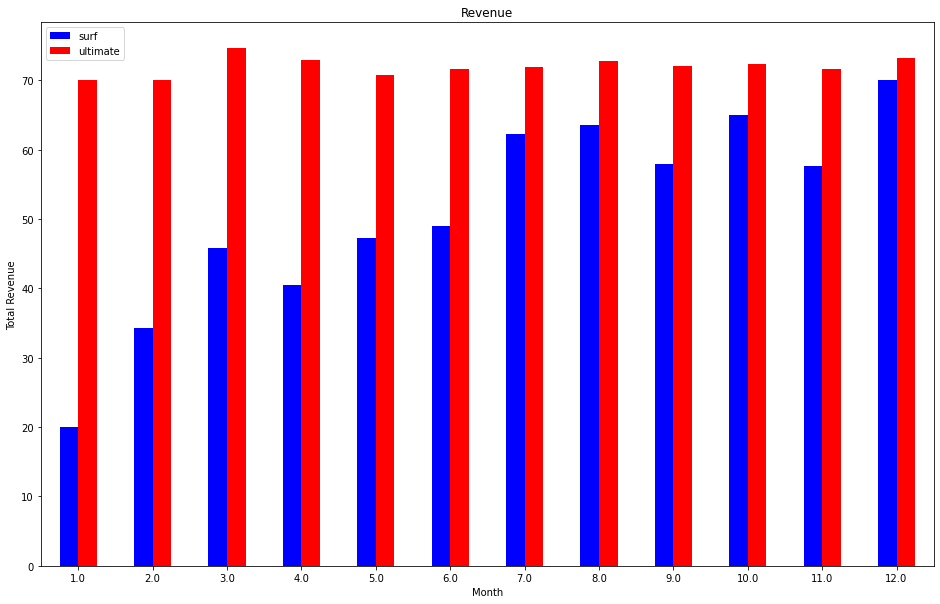

In [125]:
# Plot revenue per month, per plan
df_all_revs.plot(kind='bar',
                    title='Revenue',
                  xlabel='Month',
                  ylabel='Total Revenue',
                  color=('blue', 'red'),
                 rot=0,
                  figsize= (16,10)
                    )
plt.show()

In [126]:
# Surf revenue mean and variance
print('mean')
print(df_surf_revs.mean())
print()
print('variance')
print(df_surf_revs.var())

mean
monthly_revenue    51.10288
dtype: float64

variance
monthly_revenue    212.439602
dtype: float64


C:\Users\XIX\AppData\Local\Temp\ipykernel_24004\3926635512.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_surf_revs.mean())
C:\Users\XIX\AppData\Local\Temp\ipykernel_24004\3926635512.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_surf_revs.var())


In [127]:
# Surf revenue mean and variance
print('mean')
print(df_ultimate_revs.mean())
print()
print('variance')
print(df_ultimate_revs.var())

mean
monthly_revenue    72.011068
dtype: float64

variance
monthly_revenue    1.860681
dtype: float64


C:\Users\XIX\AppData\Local\Temp\ipykernel_24004\3365555136.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_ultimate_revs.mean())
C:\Users\XIX\AppData\Local\Temp\ipykernel_24004\3365555136.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_ultimate_revs.var())


<AxesSubplot:title={'center':'Monthly Revenue'}>

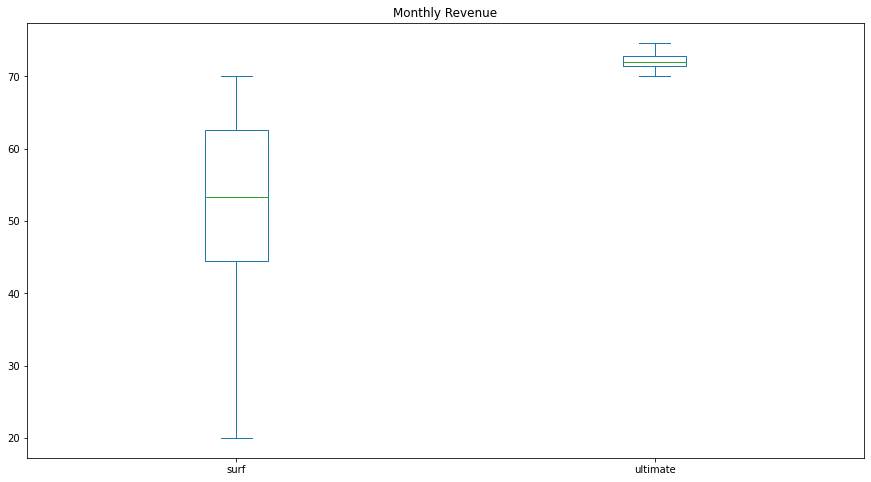

In [128]:
# Plot a boxplot to visualize the distribution of the monthly call duration
df_all_revs.plot(kind='box', title='Monthly Revenue', figsize=(15,8))

The Ultimate plan consistently sees more revenue on a monthly basis. The mean revenues for the two plans appears to be different, but this will be further explored statistically. Looking at the box plot, we see the differences in the mean revenues. The Ultimate plan has a tighter range, while the Surf plan has a wider range and variance. 

## <a id='toc1_16_'></a>[Test statistical hypotheses](#toc0_)

##### <a id='toc1_16_1_1_1_'></a>[Testing the hypothesis that the average revenues from users of the Ultimate and Surf calling plans differ.](#toc0_)

In [129]:
# Extracting the revenues from the Surf plan
surf_revs = df_surf_revs['monthly_revenue'].values.tolist()

In [130]:
# Extracting the revenues from the Ultimate Plan
ultimate_revs = df_ultimate_revs['monthly_revenue'].values.tolist()

##### <a id='toc1_16_1_1_2_'></a>[Null hypothesis is the mean revenues  of the Surf and Ultimate plans are similar](#toc0_)

In [131]:
# Test the hypotheses
# Null hypothesis that the two means are the same
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(surf_revs, ultimate_revs)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis, the average revenues differ")
else:
    print("We can't reject the null hypothesis") 


p-value:  5.981445309161515e-05
We reject the null hypothesis, the average revenues differ


Our earlier thoughts were wrong. Statistically, the mean revenues of both plans are different, but it is the Ultimate plan that brings in more revenue.  

### <a id='toc1_16_2_'></a>[Testing the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.](#toc0_)

In [161]:
# Separating data based on user ID and city
df_user_city = df_users[['user_id','city']]

In [162]:
# Adding data on plan and monthly revenue, merged by user ID
df_all_cities = df_merged[['user_id', 'plan','monthly_revenue']].merge(df_user_city, on='user_id', how='left')

In [163]:
# Grouping the monthly revenue by city
df_cities = df_all_cities.groupby('city')['monthly_revenue'].mean().reset_index()

In [135]:
# Sorting monthly revenue in descending order, by city
df_cities_sorted = df_cities.sort_values(by='monthly_revenue', ascending=False)
display(df_cities_sorted.head(20))

,city,monthly_revenue
0,"Albany-Schenectady-Troy, NY MSA",147.794000
17,"Colorado Springs, CO MSA",135.017500
70,"Urban Honolulu, HI MSA",112.408095
6,"Baton Rouge, LA MSA",104.012500
25,"Fresno, CA MSA",99.405789
21,"Dayton-Kettering, OH MSA",95.582222
63,"San Jose-Sunnyvale-Santa Clara, CA MSA",94.625806
9,"Bridgeport-Stamford-Norwalk, CT MSA",89.955789
58,"Sacramento–Roseville–Folsom, CA MSA",87.781667
30,"Jacksonville, FL MSA",86.170000


In [136]:
# Extracting rows based on the keywords that distinguish NY
df_ny = df_all_cities[df_all_cities['city'].str.contains('New York-Newark-Jersey City, NY-NJ-PA MSA')]
df_ny.reset_index()

,index,user_id,plan,monthly_revenue,city
0,30,1031,ultimate,70.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
1,31,1031,ultimate,70.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2,32,1031,ultimate,70.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
3,33,1031,ultimate,70.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
4,34,1031,ultimate,70.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
...,...,...,...,...,...
373,2270,1080,surf,80.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
374,2271,1080,surf,120.42,"New York-Newark-Jersey City, NY-NJ-PA MSA"
375,2272,1080,surf,170.27,"New York-Newark-Jersey City, NY-NJ-PA MSA"
376,2273,1080,surf,200.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [137]:
# Grouping NY revenue by user ID and monthly revenues
df_ny_rev = df_ny.groupby('user_id')['monthly_revenue'].mean()
df_ny_rev.reset_index()

,user_id,monthly_revenue
0,1014,28.475000
1,1022,55.738750
2,1024,20.930000
3,1027,33.333333
4,1031,70.000000
...,...,...
75,1469,100.000000
76,1482,70.000000
77,1494,30.430000
78,1495,118.092500


In [138]:
# Extracting the mean revenues from the NY data
ny = df_ny_rev.values.tolist()

In [139]:
# Mean of NY revenue
print('Mean: ')
df_ny_rev.mean()

Mean: 


59.72249310064935

In [140]:
# Standard Deviation of NY revenue
print('Standard Deviation: ')
df_ny_rev.std()

Standard Deviation: 


32.5551036141766

In [141]:
# Creating cities data without NY, by index
# Should see total rows drop from 73 to 72
df_cities_2 = df_cities.drop(labels=43, axis=0)

In [142]:
# Mean revenue of all the other cities
print('Mean :')
df_cities_2.mean()

Mean :


C:\Users\XIX\AppData\Local\Temp\ipykernel_24004\4283063849.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_cities_2.mean()


monthly_revenue    65.443134
dtype: float64

In [143]:
# Standard deviation of revenue of all the other cities
print('Standard Deviation :')
df_cities_2.std()

Standard Deviation :


C:\Users\XIX\AppData\Local\Temp\ipykernel_24004\2224394961.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_cities_2.std()


monthly_revenue    21.740895
dtype: float64

In [144]:
#confirming NY is not in cities 2 data 
df_cities_2.tail(30)

,city,monthly_revenue
42,"New Orleans-Metairie, LA MSA",35.015000
44,"North Port-Sarasota-Bradenton, FL MSA",58.922500
45,"Oklahoma City, OK MSA",67.980500
46,"Omaha-Council Bluffs, NE-IA MSA",20.000000
47,"Orlando-Kissimmee-Sanford, FL MSA",77.181765
48,"Oxnard-Thousand Oaks-Ventura, CA MSA",38.520000
49,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",63.490732
50,"Phoenix-Mesa-Chandler, AZ MSA",66.703250
51,"Pittsburgh, PA MSA",66.506667
52,"Portland-Vancouver-Hillsboro, OR-WA MSA",49.870909


<AxesSubplot:title={'center':'Other City Monthly Revenue'}>

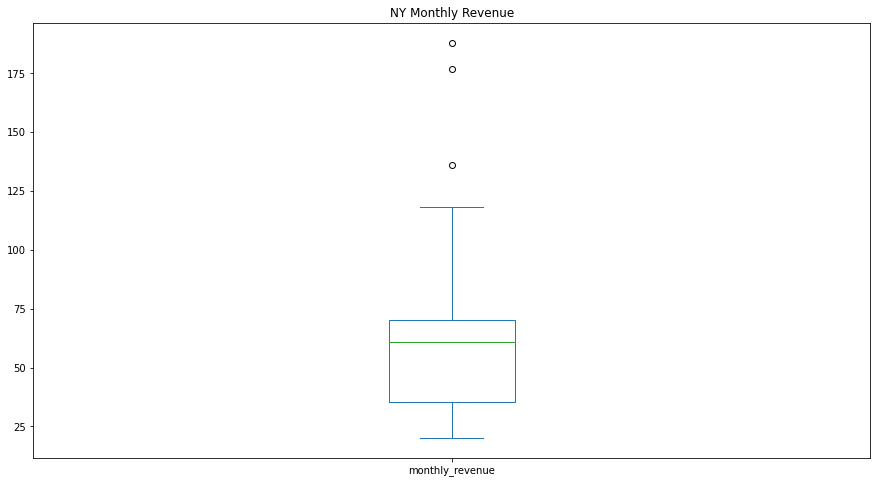

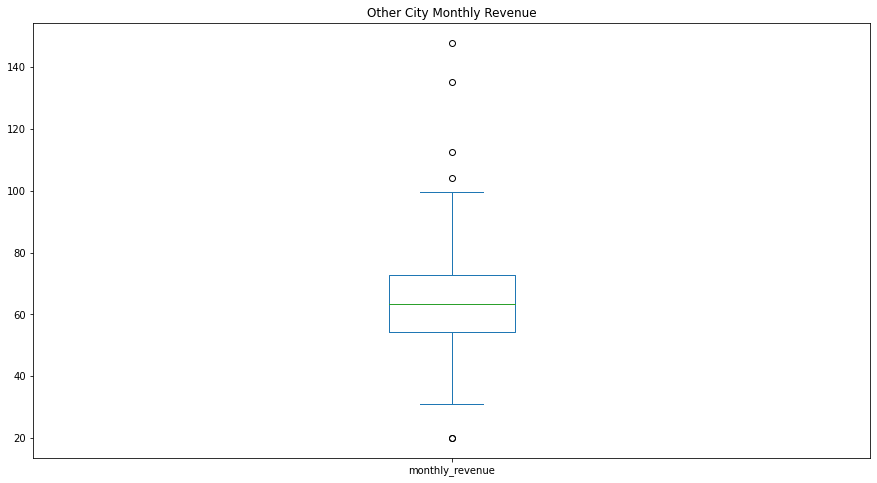

In [145]:
# Plot a boxplot to visualize the distribution of the monthly call duration
df_ny_rev.plot(kind='box', title='NY Monthly Revenue', figsize=(15,8))
df_cities_2.plot(kind='box', title='Other City Monthly Revenue',figsize=(15,8))

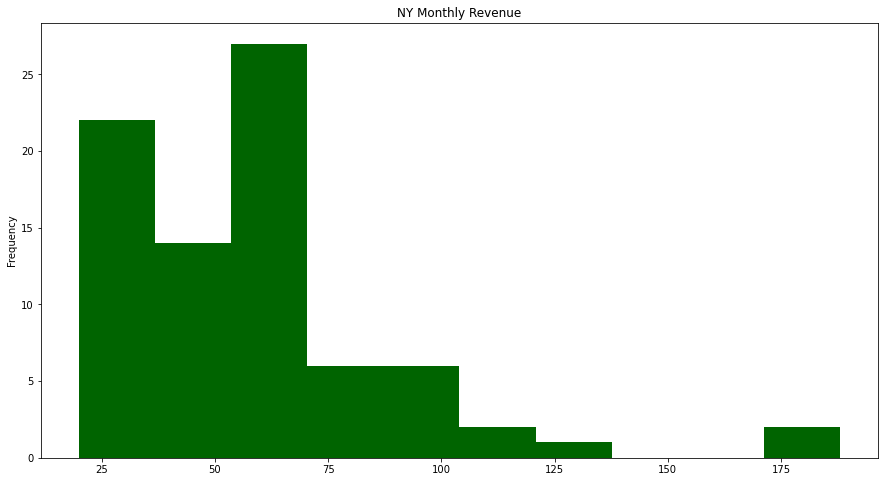

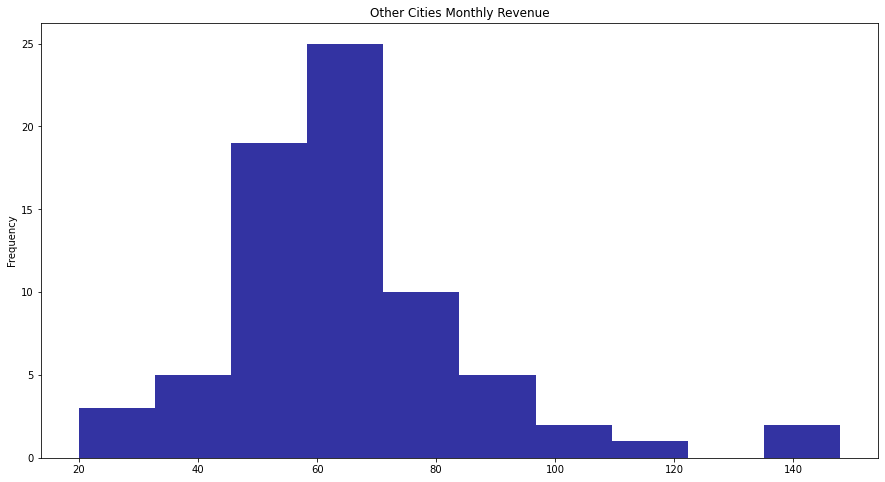

In [146]:
df_ny_rev.plot(kind='hist', title='NY Monthly Revenue', figsize=(15,8), color='darkgreen')
df_cities_2.plot(kind='hist', title='Other Cities Monthly Revenue',figsize=(15,8), color='darkblue', alpha=.8, legend=False)

plt.show()

In [147]:
# Extracting mean revenues from cities 2 data 
cities_2 = df_cities_2['monthly_revenue'].values.tolist()

##### <a id='toc1_16_2_1_1_'></a>[Null hypothesis that the mean revenue of Ny vs the other cities is similar](#toc0_)

In [148]:
# Test the hypotheses
# Null hypothesis that the mean of NY is the same as the mean of the other cities
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(ny, cities_2)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis, the average revenues differ")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.2098498653029106
We can't reject the null hypothesis


After statistical testing, we can not reject the null hypothesis that the mean of NY revenue is similar the the mean revenue of all the other cities. This suggests that they are indeed similar. This finding is further supported by the box plots, and histograms. 

#### <a id='toc1_16_2_2_'></a>[Relationship between revenue and age](#toc0_)

In [149]:
# Making a dataset of the customers plan and monthly revenue, based on age
df_age_rev = df_users[['age', 'user_id']].merge(df_merged, on='user_id', how='outer')
df_age= df_age_rev[['age', 'user_id', 'plan', 'monthly_revenue']]

In [150]:
# Getting a count of the number of customers at each age 
df_customers = df_age.groupby('age')['age'].count()

<AxesSubplot:title={'center':'Age of Customers'}, xlabel='age', ylabel='Age'>

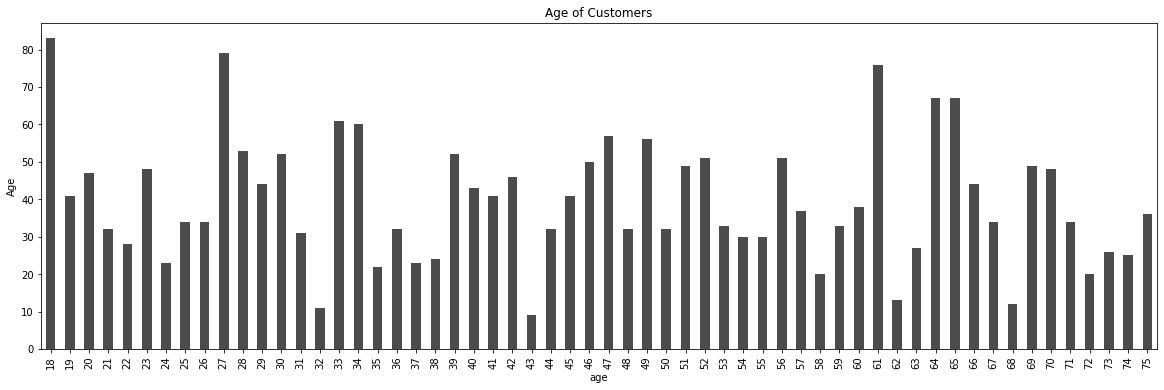

In [151]:
# plotting the distribution of customer ages, across both plans
df_customers.plot(kind='bar', figsize=(20,6), ylabel='Age', title='Age of Customers', color='black', alpha=.7)

In [152]:
# Grouping by ages and plans
df_customer_plans = df_age.groupby(['age', 'plan'])['user_id'].count()
df_customer_plans = pd.DataFrame(df_customer_plans).reset_index(level=1)
df_customer_plans.columns = ['plan', 'customers']

In [153]:
# Extracting all age groups with Surf plan
df_surf_customers = df_customer_plans[df_customer_plans['plan'].str.contains('surf')]

In [154]:
# Extracting all age groups with Ultimate plan
df_ultimate_customers = df_customer_plans[df_customer_plans['plan'].str.contains('ultimate')]

In [155]:
# Recombining Surf and Ultimate customers, based on age
df_plan_ages = df_surf_customers.merge(df_ultimate_customers, on='age', how='left')
df_plan_ages.columns = ['plan_s', 'surf_customers', 'plan_u', 'ultimate_customers']

<AxesSubplot:title={'center':'Age of Customers'}, xlabel='Age', ylabel='Number of Customers'>

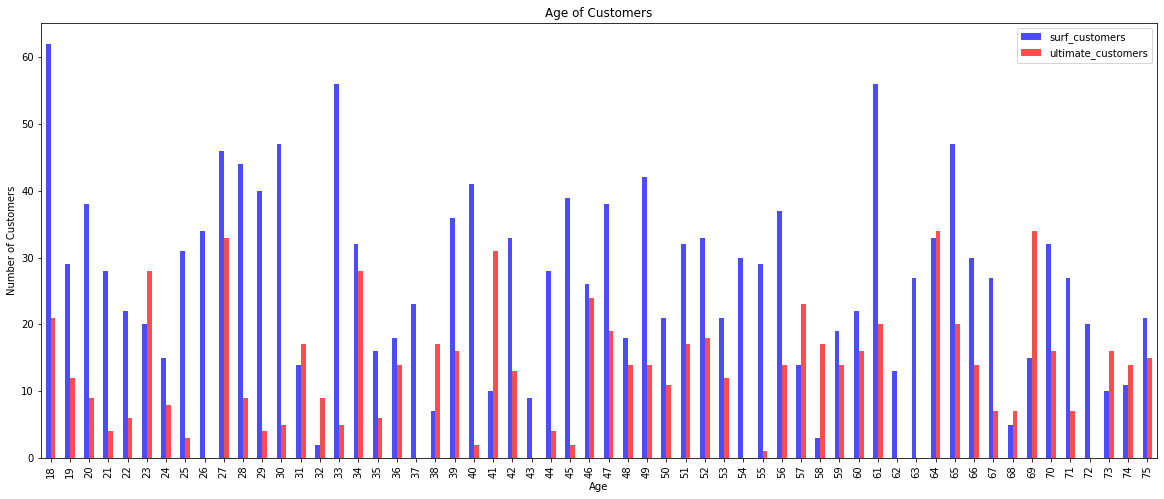

In [156]:
# Showing the distributon of plan choices, based on age
df_plan_ages.plot(kind='bar', figsize=(20,8), ylabel='Number of Customers', xlabel='Age',
                  title='Age of Customers', color=('blue', 'red'), alpha=.7)

We see most age groups prefer the Surf plan, with a few exceptions that prefer the Ultimate plan. We were expecting to see a pattern that suggests younger customers prefer the cheaper plan, yet the data does not suggest that. 

#### <a id='toc1_16_2_3_'></a>[Comparing revenue and age](#toc0_)

In [157]:
# Mean Revenue based on age
age_rev_mean = df_age.groupby('age')['monthly_revenue'].mean()

In [158]:
# Total monthly revenue based on age
age_rev_sum = df_age.groupby('age')['monthly_revenue'].sum()

<AxesSubplot:title={'center':'Total Revenue'}, xlabel='Age', ylabel='Total Revenue'>

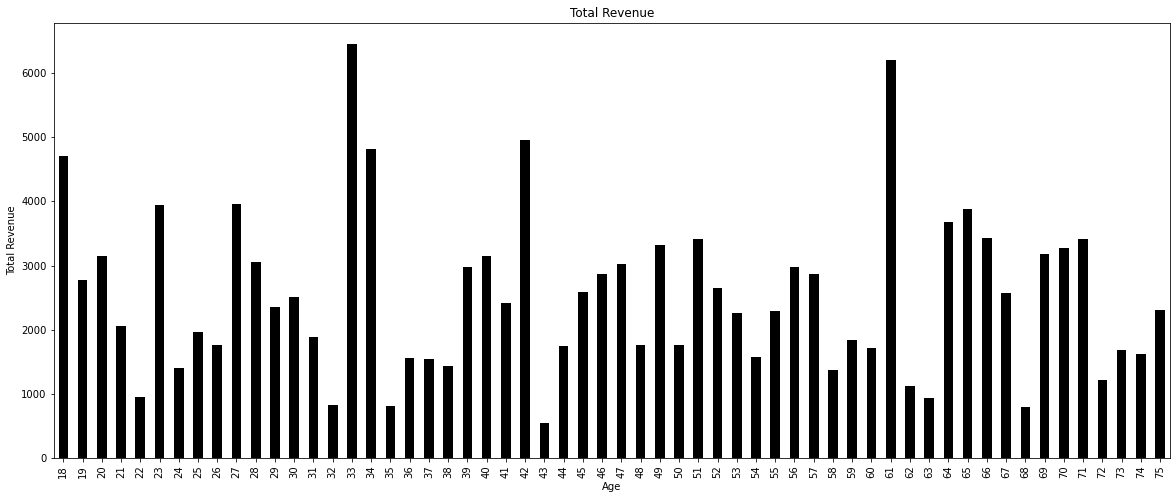

In [159]:
# Displaying total revenue, based on age
age_rev_sum.plot(kind='bar', figsize=(20,8), ylabel='Total Revenue', xlabel='Age', title='Total Revenue', color='black')

<AxesSubplot:title={'center':'Average Revenue'}, xlabel='Age', ylabel='Mean Revenue'>

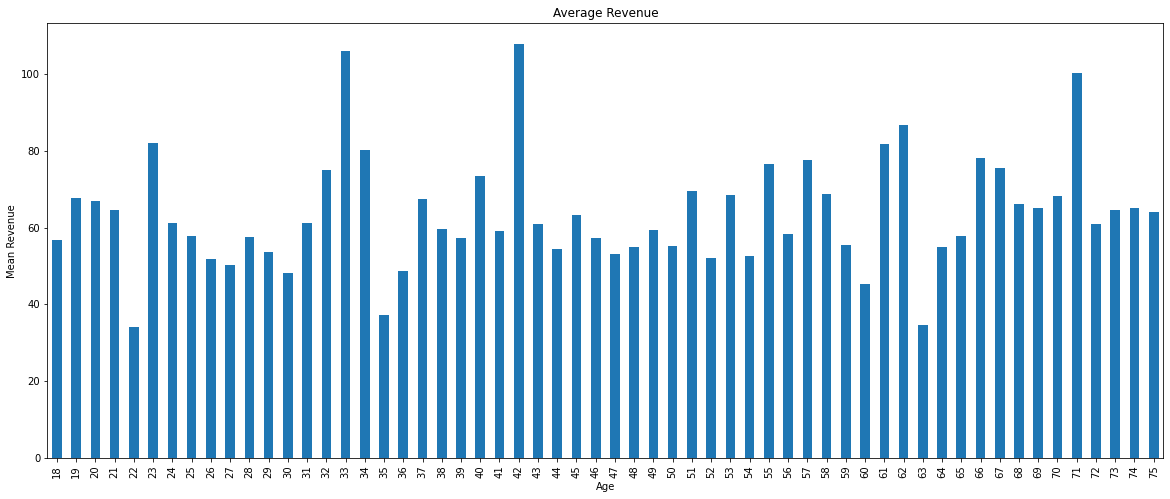

In [160]:
# Displaying mean revenue, based on age
age_rev_mean.plot(kind='bar', figsize=(20,8), ylabel='Mean Revenue', xlabel='Age', title='Average Revenue')

We see that looking at total revenue based on age could be misleading, as we demonstrated the distribution of the number of customers in each age group earlier. Therefore, mean revenue would be better for making comparisons across age groups. We do not see any noticeable pattern in the data. We anticipated that younger customers would show a spike in revenue, due to their perceived lack of maturity. However, that was not the case. We only see spikes in the data with Ultimate plan customers in a few age groups. The age groups with the smallest mean revenue are 22, 35, and 63 year olds. Those with the highest revenue are 33, 42, and 71 year olds. 

# <a id='toc2_'></a>[Conclusions](#toc0_)

The data shows statistical differences in mean revenue among the two plans, as the Ultimate plan brings in more revenue. Our significance level was set to 5%, and our p value was much higher. In simpler words, we reject our null hypothesis that the mean revenues were similar. 

The data shows us that capital allocation to marketing the Ultimate plan would likely yield a better cash on cash return, not based on popularity, but on revenue. As the Surf plan is more popular, new customers should be lead to the Ultimate plan instead. We saw many Surf customers would experience overages on their plan. These would be the prime customer base to push towards the ultimate plan. 

We see that the mean revenue of customers in New York appears to be similar to that of all the other cities combined.  Yet, Honolulu, Albany, and Colorado Springs are the cities with the highest average revenue. A marketing push may also be a good idea in those areas, to further increase revenue, while also considering market saturation. We did not see a preference of plans of customers of different age groups, as most preferred the Surf plan. 

Overall, the Ultimate plan is not very popular. As such, maybe it would be beneficial to test a middle tier plan, in order to capture customers who may be dismayed by the gap in plan prices. Another method that would lead to increased revenue would be to slightly increase the overage fees on the Surf plan. Yet, a smart revenue strategy remains in rounding up minutes, and more substantially, rounding up data used to the nearest gigabyte. Data usage appears to be the largest contributor to revenue.

Finally, Hypothesis testing suggests the mean of the call durations and number of messages were not different. On the other hand, internet traffic is different, when conducting statistical tests on the means.